In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, GroupKFold, GridSearchCV, KFold, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
def imprime_resultados(results):
    media = results['test_score'].mean() * 100
    desvio = results['test_score'].std() * 100
    print("Accuracy médio %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))


In [3]:
dados = pd.read_csv('machine-learning-carros-simulacao.csv').drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [4]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
55,76666.68,0,16,24846.60026
41,57463.74,0,15,23114.95042
42,41296.05,0,10,19485.88872
43,96446.05,0,17,38476.10072
45,64387.60,0,10,23609.01780


In [5]:
SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier(strategy='stratified')
results = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100,
                                                            (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [49.79, 53.45]


In [6]:
# gerando dados aleatórios de modelo de carro para simulação de agrupamento ao usar nosso estimador

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv=10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao) * 100,
                                                            (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [72.89, 78.67]


In [7]:
# gerando dados aleatórios de modelo de carro para simulação de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [8]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.80
Intervalo [72.90, 78.69]


In [9]:
# GroupKFold em um pipeline com StandardScaler e SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.07, 79.29]


In [10]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.80
Intervalo [72.90, 78.69]


In [11]:
modelo.fit(x_azar, y_azar)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


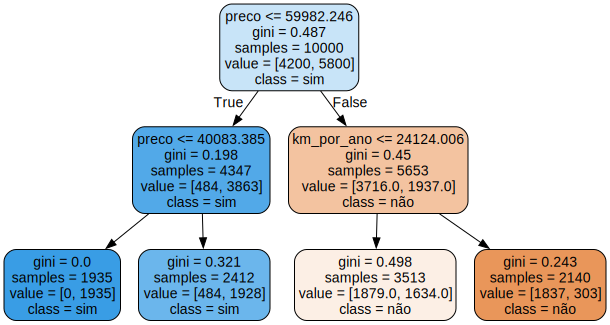

In [12]:
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=["não", "sim"],
                feature_names =  features)

graph = graphviz.Source(dot_data)
graph

In [13]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.68
Intervalo [75.57, 81.80]


In [14]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
  print("max_depth = %d, media =%.2f" % (max_depth, results['test_score'].mean() * 100))

for i in range (1, 33):
      roda_arvore_de_decisao(i)

max_depth = 1, media =75.80
max_depth = 2, media =75.80
max_depth = 3, media =78.68
max_depth = 4, media =78.66
max_depth = 5, media =78.59
max_depth = 6, media =78.54
max_depth = 7, media =78.31
max_depth = 8, media =77.90
max_depth = 9, media =77.45
max_depth = 10, media =76.97
max_depth = 11, media =76.66
max_depth = 12, media =76.31
max_depth = 13, media =75.96
max_depth = 14, media =75.41
max_depth = 15, media =75.01
max_depth = 16, media =74.91
max_depth = 17, media =74.53
max_depth = 18, media =74.26
max_depth = 19, media =73.83
max_depth = 20, media =73.60
max_depth = 21, media =73.11
max_depth = 22, media =72.95
max_depth = 23, media =73.01
max_depth = 24, media =72.53
max_depth = 25, media =72.37
max_depth = 26, media =72.09
max_depth = 27, media =72.21
max_depth = 28, media =72.08
max_depth = 29, media =71.97
max_depth = 30, media =71.93
max_depth = 31, media =71.97
max_depth = 32, media =72.00


In [15]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f," % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))

for i in range (1, 33):
      roda_arvore_de_decisao(i)

Arvore max_depth = 1, treino = 75.79, teste = 75.80,
Arvore max_depth = 2, treino = 75.79, teste = 75.80,
Arvore max_depth = 3, treino = 78.75, teste = 78.68,
Arvore max_depth = 4, treino = 78.79, teste = 78.66,
Arvore max_depth = 5, treino = 78.95, teste = 78.59,
Arvore max_depth = 6, treino = 79.14, teste = 78.54,
Arvore max_depth = 7, treino = 79.44, teste = 78.31,
Arvore max_depth = 8, treino = 79.82, teste = 77.90,
Arvore max_depth = 9, treino = 80.33, teste = 77.45,
Arvore max_depth = 10, treino = 81.05, teste = 76.97,
Arvore max_depth = 11, treino = 81.86, teste = 76.66,
Arvore max_depth = 12, treino = 82.82, teste = 76.31,
Arvore max_depth = 13, treino = 83.90, teste = 75.96,
Arvore max_depth = 14, treino = 84.88, teste = 75.41,
Arvore max_depth = 15, treino = 85.93, teste = 75.01,
Arvore max_depth = 16, treino = 87.04, teste = 74.91,
Arvore max_depth = 17, treino = 88.07, teste = 74.53,
Arvore max_depth = 18, treino = 89.13, teste = 74.26,
Arvore max_depth = 19, treino = 90.20

In [16]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, treino = %.2f, teste = %.2f" % (max_depth, results['train_score'].mean() * 100, results['test_score'].mean() * 100))
  tabela = [max_depth, train_score, test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1, 33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth", "train", "test"])
resultados.head()


Arvore max_depth = 1, treino = 75.79, teste = 75.80
Arvore max_depth = 2, treino = 75.79, teste = 75.80
Arvore max_depth = 3, treino = 78.75, teste = 78.68
Arvore max_depth = 4, treino = 78.79, teste = 78.66
Arvore max_depth = 5, treino = 78.95, teste = 78.59
Arvore max_depth = 6, treino = 79.14, teste = 78.54
Arvore max_depth = 7, treino = 79.44, teste = 78.31
Arvore max_depth = 8, treino = 79.82, teste = 77.90
Arvore max_depth = 9, treino = 80.33, teste = 77.45
Arvore max_depth = 10, treino = 81.05, teste = 76.97
Arvore max_depth = 11, treino = 81.86, teste = 76.66
Arvore max_depth = 12, treino = 82.82, teste = 76.31
Arvore max_depth = 13, treino = 83.90, teste = 75.96
Arvore max_depth = 14, treino = 84.88, teste = 75.41
Arvore max_depth = 15, treino = 85.93, teste = 75.01
Arvore max_depth = 16, treino = 87.04, teste = 74.91
Arvore max_depth = 17, treino = 88.07, teste = 74.53
Arvore max_depth = 18, treino = 89.13, teste = 74.26
Arvore max_depth = 19, treino = 90.20, teste = 73.83
Ar

,max_depth,train,test
0,1,75.791308,75.795015
1,2,75.791308,75.795015
2,3,78.751166,78.683167
3,4,78.788947,78.663124
4,5,78.949014,78.591557


<Axes: xlabel='max_depth', ylabel='train'>

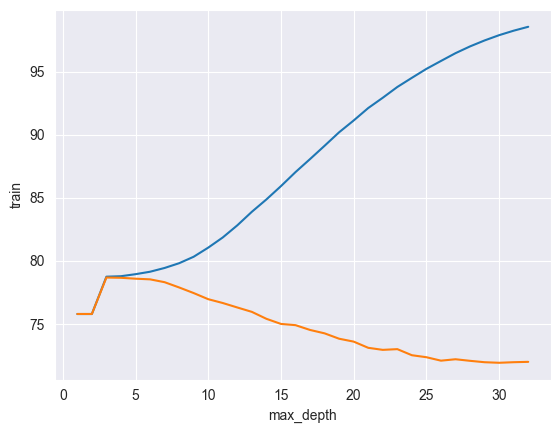

In [17]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)

,max_depth,train,test
2,3,78.751166,78.683167
3,4,78.788947,78.663124
4,5,78.949014,78.591557
5,6,79.143373,78.540192
6,7,79.442263,78.314519


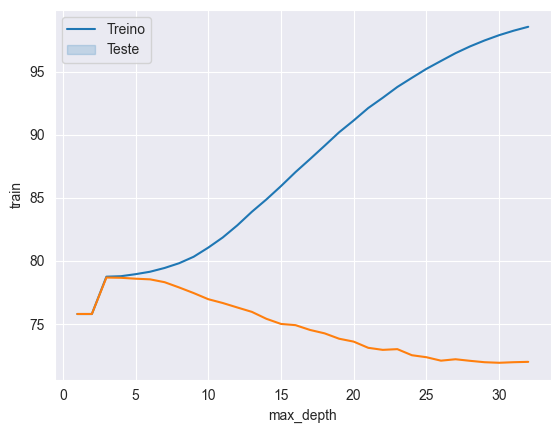

In [18]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)
sns.lineplot(x = "max_depth", y = "test", data = resultados)
plt.legend(["Treino", "Teste"])

resultados.sort_values("test", ascending=False).head()

In [19]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  print("Arvore max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in  [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

resultados.sort_values("test", ascending=False).head()

Arvore max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.68
Arvore max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.68
Arvore max_depth = 

,max_depth,min_samples_leaf,train,test
15,4,256,78.751166,78.683167
14,4,128,78.751166,78.683167
13,4,64,78.751166,78.683167
12,4,32,78.751166,78.683167
11,3,256,78.751166,78.683167


In [20]:
corr = resultados.corr()

<Axes: >

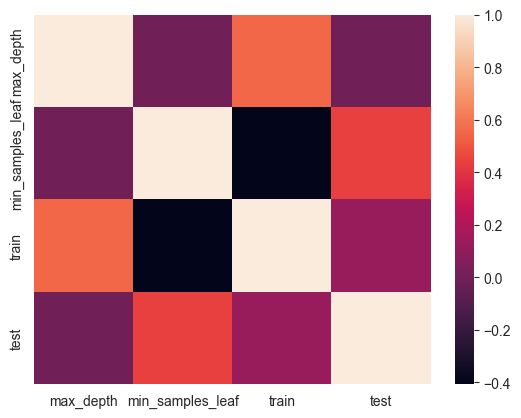

In [21]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train', ylabel='max_depth'>,
        <Axes: xlabel='test', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train'>,
        <Axes: xlabel='train', ylabel='train'>,
        <Axes: xlabel='test', ylabel='train'>],
       [<Axes: xlabel='max_depth', ylabel='test'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test'>,
        <Axes: xlabel='train', ylabel='test'>,
        <Axes: xlabel='test', ylabel='test'>]], dtype=object)

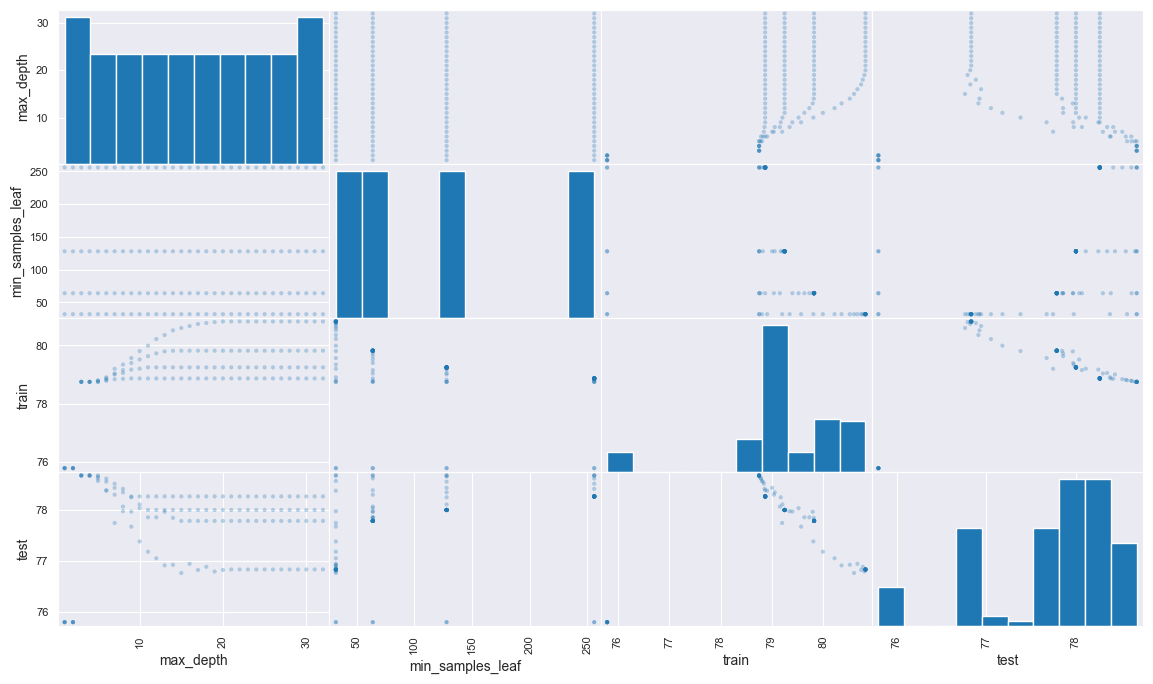

In [22]:
pd.plotting.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

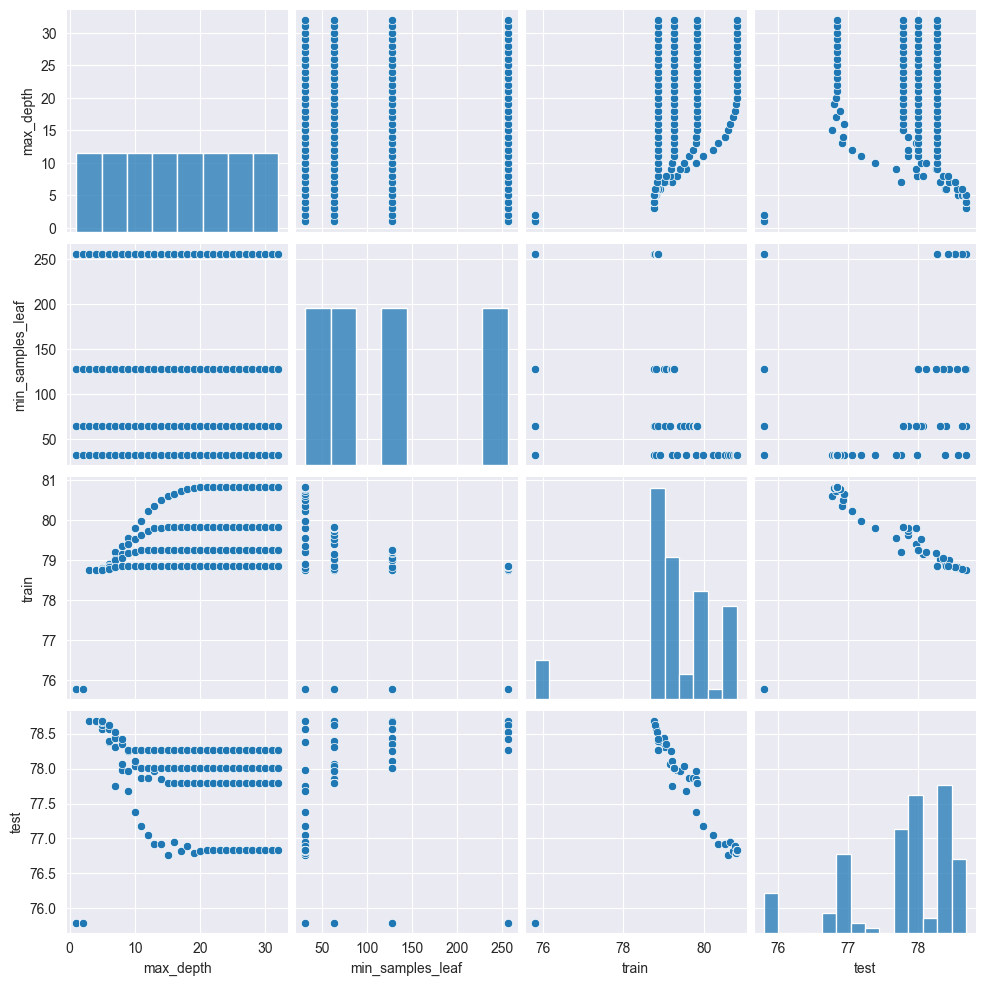

In [23]:
sns.pairplot(resultados)

<Axes: >

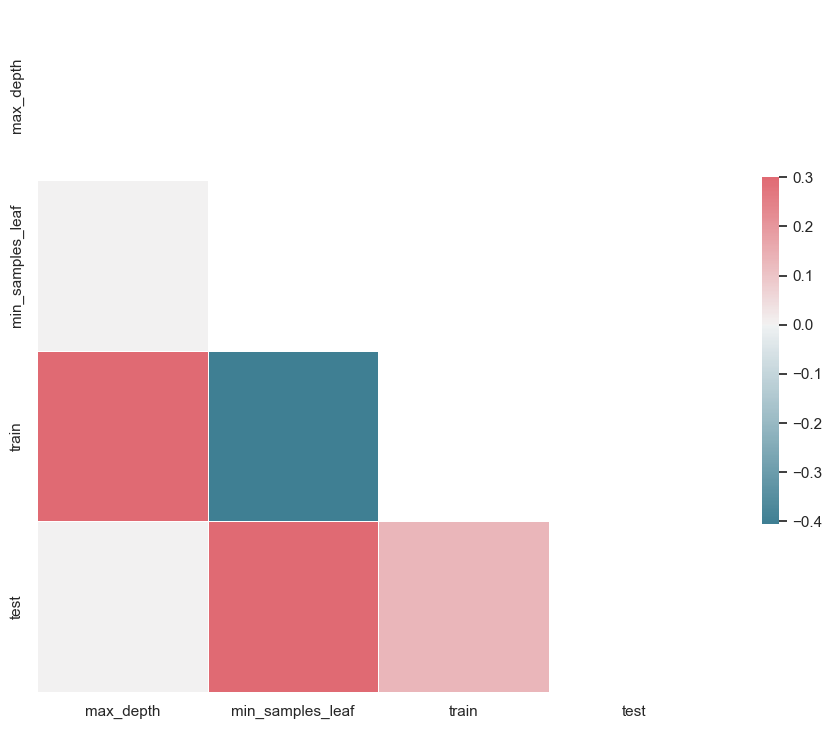

In [24]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
def busca():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","train","test"])
  return resultados

resultados = busca()
resultados.head()

Arvore max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.80
Arvore max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.80
Arvore max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.68
Arvore max_depth = 3, min_samples_leaf = 512, treino = 77.52, teste = 77.51
Arvore max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.68
Arvore max_d

,max_depth,min_samples_leaf,train,test
0,1,128,75.791308,75.795015
1,1,192,75.791308,75.795015
2,1,256,75.791308,75.795015
3,1,512,75.791308,75.795015
4,2,128,75.791308,75.795015


In [26]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
12,4,128,78.751166,78.683167
10,3,256,78.751166,78.683167
13,4,192,78.751166,78.683167
14,4,256,78.751166,78.683167
9,3,192,78.751166,78.683167


In [27]:
corr = resultados.corr()

corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000e+00,6.863211e-17,0.354186,0.218947
min_samples_leaf,6.863211e-17,1.000000e+00,-0.644005,-0.404086
train,3.541859e-01,-6.440048e-01,1.000000,0.895210
test,2.189475e-01,-4.040864e-01,0.895210,1.000000


In [28]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar,groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007637,0.000412,0.001400,0.000183,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
1,0.006980,0.000225,0.001078,0.000161,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
2,0.006978,0.000348,0.001047,0.000123,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
3,0.008094,0.002825,0.001606,0.001094,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1
4,0.012850,0.002958,0.002253,0.000477,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767096,...,0.818905,0.774063,0.806773,0.794147,0.771717,0.792857,0.777154,0.786832,0.01558,1


In [29]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.68316661476126


In [30]:
melhor = busca.best_estimator_
melhor

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,32
,min_samples_leaf,32
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
# Evitar essa abordagem pois ela está sendo muito otimista
predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100

print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


In [33]:
# nested cross validation

# infelizmente como o Pandas não suporta nested validation com group k fold, não conseguimos prever
# o resultado para novos grupos
# cross_val_score(busca, x_azar, y_azar, cv= GroupKFold(n_splits = 10), groups=dados.modelo)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_search.py", line 1051, in fit
    self._run_search(evaluate_candidates)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_search.py", line 1605, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_search.py", line 1009, in evaluate_candidates
    for (cand_idx, parameters), (split_idx, (train, test)) in product(
                                                              ~~~~~~~^
        enumerate(candidate_params),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        enumerate(cv.split(X, y, **routed_params.splitter.split)),
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_split.py", line 411, in split
    for train, test in super().split(X, y, groups):
                       ~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_split.py", line 142, in split
    for test_index in self._iter_test_masks(X, y, groups):
                      ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_split.py", line 154, in _iter_test_masks
    for test_index in self._iter_test_indices(X, y, groups):
                      ~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "C:\Users\soste\.virtualenvs\curso-4-5-Machine-Learning-Otimizacao-mode-FGRYJeHb\Lib\site-packages\sklearn\model_selection\_split.py", line 612, in _iter_test_indices
    raise ValueError("The 'groups' parameter should not be None.")
ValueError: The 'groups' parameter should not be None.


In [35]:
SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006590,0.000269,0.001461,0.000242,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
1,0.005940,0.000087,0.001073,0.000176,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
2,0.006067,0.000180,0.001103,0.000139,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
3,0.005890,0.000056,0.000985,0.000030,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1
4,0.005844,0.000154,0.000989,0.000066,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7825,0.7915,0.7965,0.777,0.7875,0.787,0.006797,1


In [37]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.803 , 0.7745, 0.7855, 0.785 , 0.787 ])

In [39]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

imprime_score(scores)

Accuracy médio 78.70
Intervalo [76.87, 80.53]


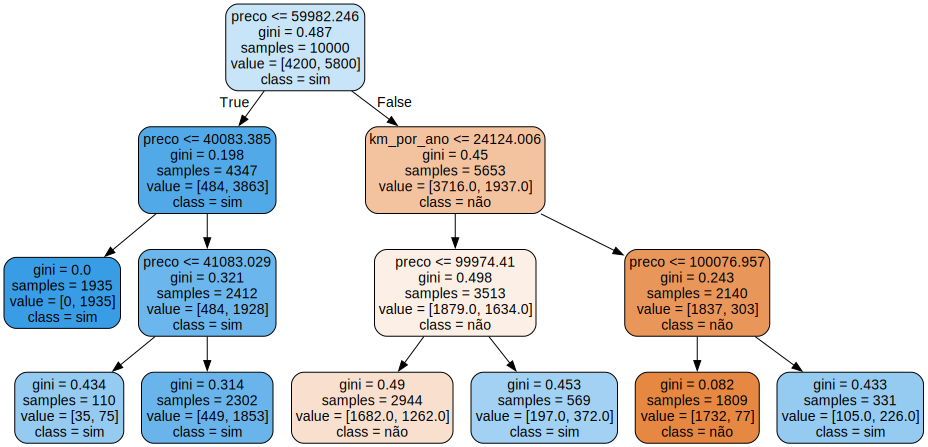

In [38]:
features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph